# Analyse exploratoire des données 

Ce fichier est une analyse des données récupérées et mises en forme. Il fait des statistques simples afin d'avoir une intuition  pour des algorithmes plus poussés par la suite. 

In [3]:
import fastparquet
import pyarrow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Ouverture du fichier 

In [6]:
# Définition du dossier data
folder_path = r'C:\Users\romai\Projets ML\natural_surf_lodge\data'

review_path = folder_path + '\df_reviews.parquet'

In [7]:
df = pd.read_parquet(review_path)

In [8]:
df.head()

date  note                               titre  \
0 2023-08-01   5.0                Natural Surf Lodge❤️   
1 2023-08-01   5.0                     Super Surf Camp   
2 2023-08-01   5.0  surf, détente naturelle et partage   
3 2023-08-01   5.0                    C’était génial !   
4 2023-07-01   5.0              Je veux y retourner!!!   

                                         commentaire cle_html_dict  
0  Des vacances exceptionnelles dans un endroit e...             1  
1  Super Surf camp! une très bonne ambiance pour ...             1  
2  Venue pour la 4eme fois, j'ai de nouveau passé...             1  
3  Là pour une semaine ado en tipi; Très bien acc...             1  
4  C'est le meilleur stage de surf que j'ai fais....             1

In [9]:
# Ici, on extrait annee, jour, mois 
df['annee'] = df['date'].dt.year
df['mois'] = df['date'].dt.month
df['jour'] = df['date'].dt.day

df.head()

date  note                               titre  \
0 2023-08-01   5.0                Natural Surf Lodge❤️   
1 2023-08-01   5.0                     Super Surf Camp   
2 2023-08-01   5.0  surf, détente naturelle et partage   
3 2023-08-01   5.0                    C’était génial !   
4 2023-07-01   5.0              Je veux y retourner!!!   

                                         commentaire cle_html_dict  annee  \
0  Des vacances exceptionnelles dans un endroit e...             1   2023   
1  Super Surf camp! une très bonne ambiance pour ...             1   2023   
2  Venue pour la 4eme fois, j'ai de nouveau passé...             1   2023   
3  Là pour une semaine ado en tipi; Très bien acc...             1   2023   
4  C'est le meilleur stage de surf que j'ai fais....             1   2023   

   mois  jour  
0     8     1  
1     8     1  
2     8     1  
3     8     1  
4     7     1

L'extraction des jours, mois, annees va permettre de descendre d'un grain plus fin dans les analyses.

In [10]:
df['note'].value_counts()

5.0    871
4.0     55
Name: note, dtype: int64

On crée une colonne pour avoir la longueur des commentaires. 

In [25]:
df['longueur_comment'] = df['commentaire'].apply(lambda x : len(x))
df.head()

date  note                               titre  \
0 2023-08-01   5.0                Natural Surf Lodge❤️   
1 2023-08-01   5.0                     Super Surf Camp   
2 2023-08-01   5.0  surf, détente naturelle et partage   
3 2023-08-01   5.0                    C’était génial !   
4 2023-07-01   5.0              Je veux y retourner!!!   

                                         commentaire cle_html_dict  annee  \
0  Des vacances exceptionnelles dans un endroit e...             1   2023   
1  Super Surf camp! une très bonne ambiance pour ...             1   2023   
2  Venue pour la 4eme fois, j'ai de nouveau passé...             1   2023   
3  Là pour une semaine ado en tipi; Très bien acc...             1   2023   
4  C'est le meilleur stage de surf que j'ai fais....             1   2023   

   mois  jour  longueur_comment  
0     8     1               623  
1     8     1               749  
2     8     1               851  
3     8     1               217  
4     7     1               212

On remarque que les avis sont excellents. 

## Visualisation de données avec Seaborn

## Evolutions

Text(0, 0.5, 'Note sur 5')

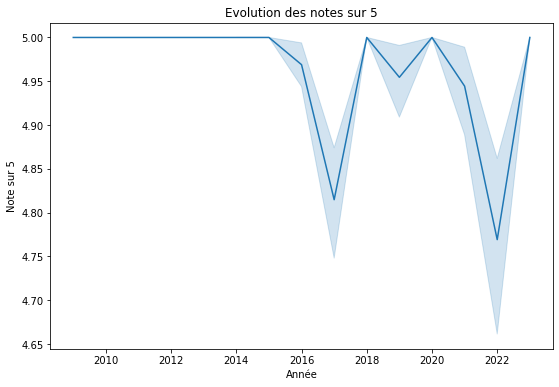

In [15]:
# Evolution de la note moyenne sur 5
plt.figure(figsize=(9,6))
sns.lineplot(data = df, x = 'annee', y = 'note')
plt.title('Evolution des notes sur 5')
plt.xlabel('Année')
plt.ylabel('Note sur 5')

Text(0, 0.5, 'Note sur 5')

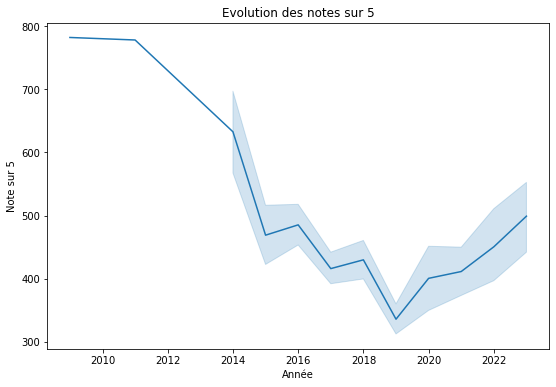

In [26]:
# Evolution de la longueur des commentaires
plt.figure(figsize=(9,6))
sns.lineplot(data = df, x = 'annee', y = 'longueur_comment')
plt.title('Evolution des notes sur 5')
plt.xlabel('Année')
plt.ylabel('Note sur 5')

On voit une tendance à la baisse dans la longueur des commentaires. En revanche, les notes sur 5 ne diminuent pas. Ainsi, on ne peut pas tirer de conclusion entre longueur des commentaires et notes. 

## Distributions 

Text(0, 0.5, 'Longueur des commentaires')

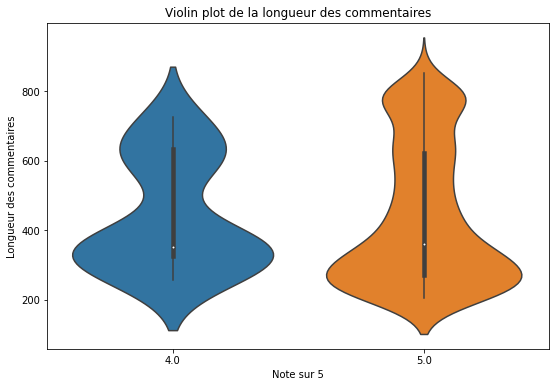

In [38]:
# Distribution de la longueur des commentaires
plt.figure(figsize=(9,6))
sns.violinplot(data = df, x = 'note', y = 'longueur_comment')
plt.title('Violin plot de la longueur des commentaires')
plt.xlabel('Note sur 5')
plt.ylabel('Longueur des commentaires')

## Questions à poser aux données : 

- Est-ce qu'il existe un pic d'activité pour le NSL ? 
- Quelle est la part de commentaires très positifs postés durant ce pic d'activité ?
- Est-ce que les commentaires très positifs sont postés tout au long de l'ouverture du Lodge ou pendant une période spécifique ?

### Pic d'activité

In [54]:
# On compte le nombre d'avis par mois et par année
df_comments = df.groupby(['annee', 'mois']).size().unstack()

df_comments

mois     4     5     6     7     8     9     10   11
annee                                               
2009    5.0   NaN   NaN   NaN   NaN   NaN   NaN  NaN
2011    1.0   NaN   NaN   NaN   NaN   NaN   NaN  NaN
2014    NaN  12.0   2.0   NaN   5.0   NaN   NaN  NaN
2015   10.0  10.0   5.0  15.0  25.0  15.0   5.0  NaN
2016   25.0  20.0  15.0  20.0  20.0  36.0  25.0  NaN
2017    5.0  10.0  25.0  40.0  20.0  25.0  10.0  NaN
2018   20.0  10.0   NaN  15.0  60.0  30.0   5.0  NaN
2019   10.0  15.0  10.0  25.0  25.0  15.0  10.0  NaN
2020    NaN   NaN   NaN  10.0  10.0  25.0   5.0  NaN
2021    NaN  20.0   5.0  10.0  35.0  10.0   5.0  5.0
2022    NaN   NaN   5.0  15.0  25.0  15.0   5.0  NaN
2023   10.0  10.0  10.0  19.0  16.0   NaN   NaN  NaN

Une première chose à remarquer est que les commentaires sont datés des périodes d'ouverture du Lodge (d'avril à novembre).

In [57]:
# On somme par mois (verticalement)
df_comments.sum(axis = 0)

mois
4      86.0
5     107.0
6      77.0
7     169.0
8     241.0
9     171.0
10     70.0
11      5.0
dtype: float64

*Les mois de juillet, août et septembre sont des pics d'activité pour le lodge.*

In [58]:
# On compte les notes pas mois 
df_notes = df.groupby(['note', 'mois']).size().unstack()

df_notes

mois    4      5     6      7      8      9     10   11
note                                                   
4.0    NaN    NaN   5.0   15.0   25.0    NaN  10.0  NaN
5.0   86.0  107.0  72.0  154.0  216.0  171.0  60.0  5.0

On veut ensuite regarder le nombre de commentaires 4 et 5 étoiles par mois. 

mois  note
4     5.0     1.000000
5     5.0     1.000000
6     4.0     0.064935
      5.0     0.935065
7     4.0     0.088757
      5.0     0.911243
8     4.0     0.103734
      5.0     0.896266
9     5.0     1.000000
10    4.0     0.142857
      5.0     0.857143
11    5.0     1.000000
Name: note, dtype: float64

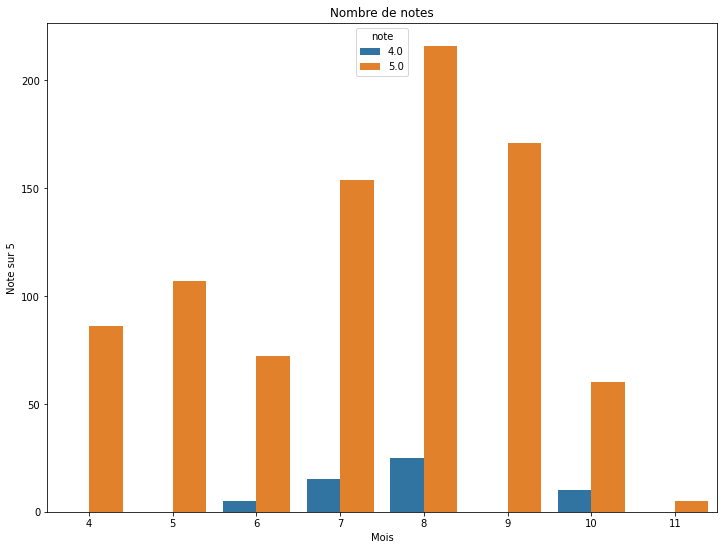

In [83]:
# Création du countplot
plt.figure(figsize=(12,9))
ax = sns.countplot(x=df['mois'], hue = df['note'])

# Ajuot des titres
ax.set_xlabel('Mois')
ax.set_ylabel('Note sur 5')
ax.set_title('Nombre de notes')

In [86]:
# Ajout des proportions
pct = lambda x: 100 * x / x.sum()
props = df.groupby(['mois']).note.value_counts(normalize = True, ascending = True)

props

mois  note
4     5.0     1.000000
5     5.0     1.000000
6     4.0     0.064935
      5.0     0.935065
7     4.0     0.088757
      5.0     0.911243
8     4.0     0.103734
      5.0     0.896266
9     5.0     1.000000
10    4.0     0.142857
      5.0     0.857143
11    5.0     1.000000
Name: note, dtype: float64

Quelque soit le mois, il y a une écrasante majorité de notes 5 sur 5. 

*Les commentaires très positifs sont postés tout au long de l'année*. 

*La part de commentaires très positifs est entre 90% et 100%.*

## Export du df 

In [1]:
# Définition des chemins
dir_path = 'C:\\Users\\romai\\Projets ML\\natural_surf_lodge'
data_path = dir_path + '\data'

NameError: name 'df' is not defined

In [ ]:
# Export dans les chemins définis
path_df_review = data_path + '/df_reviews.parquet'
df.to_parquet(path = path_df_review)